### 1, 2, 3

#### (a)

In [1]:
# part a
import numpy as np

def f_1(x):
    # x \in [-2, 2]
    return x**2 - np.exp(-x)

def f_2(x):
    # x \in [-0.2, 1.4]
    return 2*x - np.tan(x)

def f_3(x):
    # x \in [-2, 2]
    return np.exp(x + 1) - x - 2


#### (b-1)

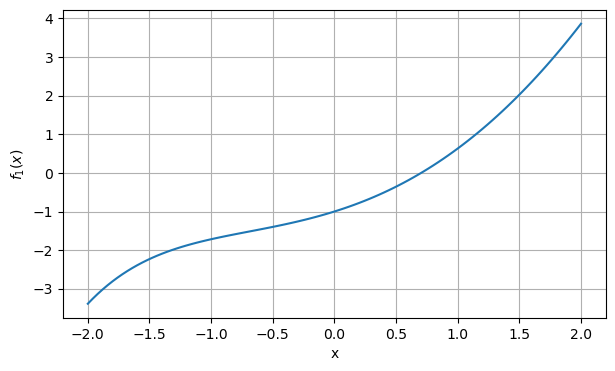

In [2]:
# part b
import matplotlib.pyplot as plt
from scipy.optimize import root
from tabulate import tabulate  # pip install tabulate

# plot the function curve to guess rough roots
x_1 = np.linspace(-2, 2, 101)
plt.figure(figsize=(7, 4))
plt.plot(x_1, f_1(x_1))
plt.xlabel('x')
plt.ylabel('$f_1(x)$')
plt.grid()
plt.show()

In [3]:
guess_1 = [0.7]  # Initial guess from the figure
r_1 = []
for g in guess_1:
    r = root(f_1, g)
    r_1.append([r.x[0], r.fun[0]])  # [r, f(r)]

In [4]:
print(tabulate(r_1, headers=["root estimate", "function value"], tablefmt='simple'))

  root estimate    function value
---------------  ----------------
       0.703467                 0


#### (b-2)

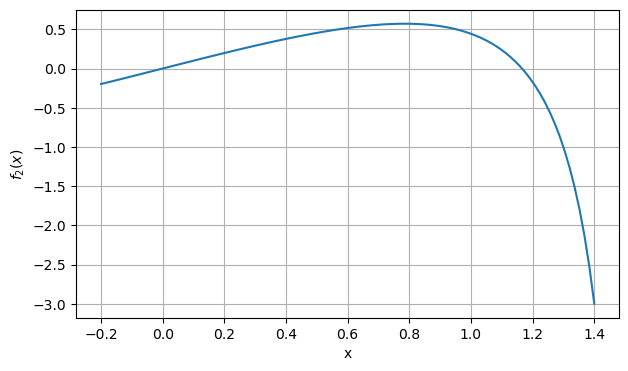

In [5]:
x_2 = np.linspace(-0.2, 1.4, 101)
plt.figure(figsize=(7, 4))
plt.plot(x_2, f_2(x_2))
plt.xlabel('x')
plt.ylabel('$f_2(x)$')
plt.grid()
plt.show()

In [6]:
guess_2 = [0., 1.2]
r_2 = []
for g in guess_2:
    r = root(f_2, g)
    r_2.append([r.x[0], r.fun[0]])
print(tabulate(r_2, headers=["root estimate", "function value"], tablefmt='simple'))

  root estimate    function value
---------------  ----------------
        0               0
        1.16556        -6.386e-13


#### (b-3)

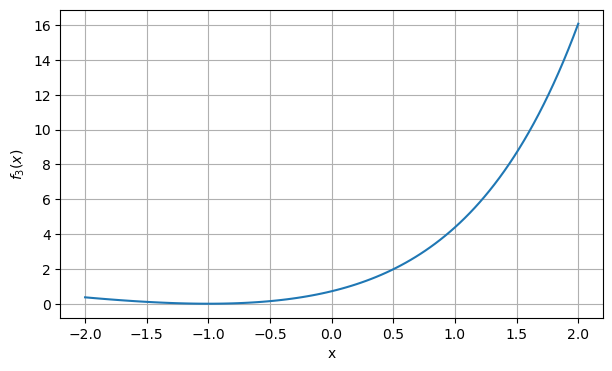

In [7]:
x_3 = np.linspace(-2, 2, 101)
plt.figure(figsize=(7, 4))
plt.plot(x_3, f_3(x_3))
plt.xlabel('x')
plt.ylabel('$f_3(x)$')
plt.grid()
plt.show()

In [8]:
guess_3 = [-1.2, -0.8]
r_3 = []
for g in guess_3:
    r = root(f_3, g)
    r_3.append([r.x[0], r.fun[0]])
print(tabulate(r_3, headers=["root estimate", "function value"], tablefmt='simple'))

  root estimate    function value
---------------  ----------------
             -1                 0
             -1                 0


#### (c)

In [9]:
def d_f_1(x):
    return 2 * x + np.exp(-x)

kappa_1 = 1 / np.abs(d_f_1(r_1[0][0]))
print(f"Condition number of root 1: {kappa_1}")

Condition number of root 1: 0.5258172982049175


In [10]:
def d_f_2(x):
    return 2 - 1 / (np.cos(x)**2)

kappa_2_1 = 1 / np.abs(d_f_2(r_2[0][0]))
kappa_2_2 = 1 / np.abs(d_f_2(r_2[1][0]))
print(f"Condition number of root 2-1: {kappa_2_1}")
print(f"Condition number of root 2-2: {kappa_2_2}")

Condition number of root 2-1: 1.0
Condition number of root 2-2: 0.22552330680325813


In [11]:
def d_f_3(x):
    return np.exp(x + 1) - 1

kappa_3 = 1 / np.abs(d_f_3(r_3[0][0]))
print(f"Condition number of root 3: {kappa_3}")

Condition number of root 3: 530257272.68473035


### 4

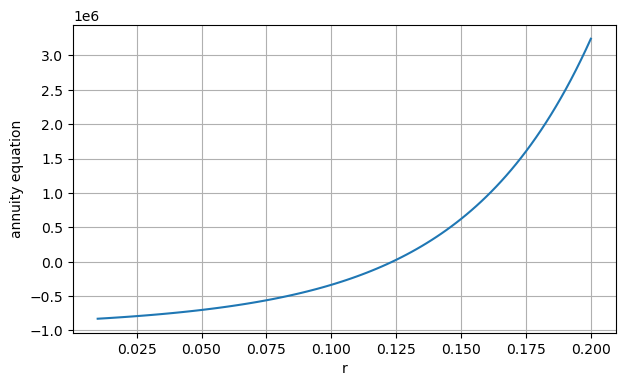

In [12]:
import numpy as np
from scipy.optimize import root
from tabulate import tabulate  # pip install tabulate


def annuity_equation(r, P):
    n = 300
    return (12 * P / r) * ((1 + r / 12) ** n - 1) - 1000000

r = np.linspace(0.01, 0.2, 100)
P = 500
plt.figure(figsize=(7, 4))
plt.plot(r, annuity_equation(r, P))
plt.xlabel('r')
plt.ylabel('annuity equation')
plt.grid()
plt.show()


In [13]:
Ps = np.arange(500, 1001, 50)
rs = []
for P in Ps:
    guess = 0.01
    sol = root(annuity_equation, guess, args=(P,))
    rs.append([P, sol.x[0], sol.fun[0]])

print(tabulate(rs, headers=["P", "r", "annuity_equation"], tablefmt="simple"))

   P          r    annuity_equation
----  ---------  ------------------
 500  0.123512          7.79983e-09
 550  0.118146          1.90921e-08
 600  0.1132           -1.02445e-08
 650  0.108607          3.0268e-08
 700  0.104317          2.04891e-08
 750  0.100287          1.0943e-08
 800  0.0964849         2.86382e-08
 850  0.0928838        -6.28643e-09
 900  0.0894611        -5.83241e-08
 950  0.0861978        -2.79397e-08
1000  0.0830778        -3.55067e-08


### 5

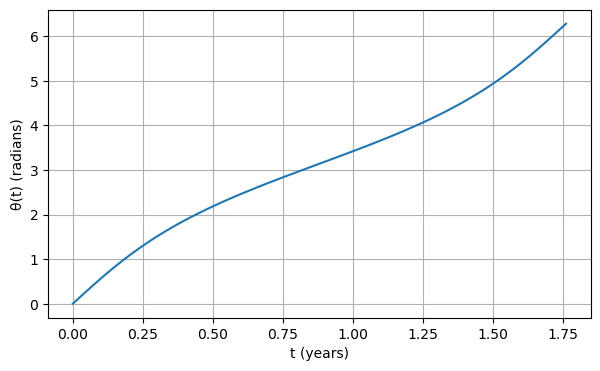

In [14]:
import numpy as np
from scipy.optimize import root
import matplotlib.pyplot as plt

# Set parameters for Eros
tau = 1.7610
epsilon = 0.2230
t_values = np.linspace(0, tau, 100)
theta = np.zeros_like(t_values)

# Define Kepler’s equation
def kepler(psi, t, epsilon, tau):
    return psi - epsilon * np.sin(psi) - (2 * np.pi * t) / tau

# Solve for each t and compute theta
for i, t in enumerate(t_values):
    guess = (2 * np.pi * t) / tau  # Initial guess for psi
    sol = root(kepler, guess, args=(t, epsilon, tau))
    psi = sol.x[0]
    tan_theta_half = np.sqrt((1 + epsilon) / (1 - epsilon)) * np.tan(psi / 2)
    theta[i] = np.arctan(tan_theta_half) * 2
    theta[i] = theta[i] % (2 * np.pi)  # Keep within [0, 2π), mod(0, 2\pi)

plt.figure(figsize=(7, 4))
plt.plot(t_values, theta)
plt.xlabel('t (years)')
plt.ylabel('θ(t) (radians)')
plt.grid()
plt.show()

### 6

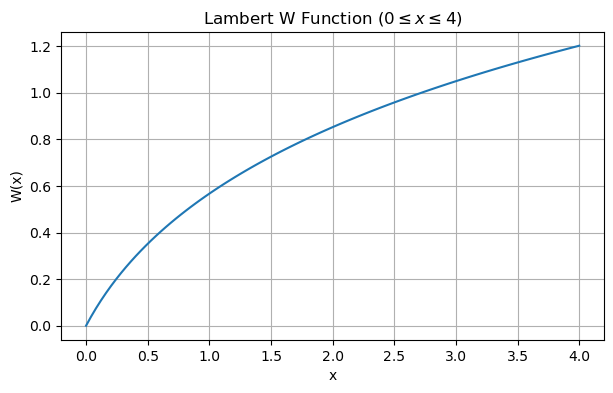

In [15]:
import numpy as np
from scipy.optimize import root
import matplotlib.pyplot as plt

def lambertW(x):
    """Compute Lambert's W function for a given x."""
    def equation(y):
        return x - y * np.exp(y)
    y_0 = 0.1  # Initial guess for y
    sol = root(equation, y_0)
    if sol.success:
        return sol.x[0]
    else:
        raise ValueError("Numerical solver did not converge.")

# Generate x values from 0 to 4
x_values = np.linspace(0, 4, 100)
w_values = [lambertW(x) for x in x_values]

# Plot the results
plt.figure(figsize=(7, 4))
plt.plot(x_values, w_values, label='W(x)')
plt.xlabel('x')
plt.ylabel('W(x)')
plt.title(r'Lambert W Function ($0 \leq x \leq 4$)')
plt.grid(True)
plt.show()